**Data Preprocessing**

Importing Pandas and loading the dataset :

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
data = pd.read_csv("data.csv")

The header of the dataset :

In [2]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The dataset's shape :

In [3]:
data.shape

(1460, 81)

Let's check now if there is any duplicated rows :

In [4]:
int(data.duplicated().sum())

0

Now let's split the dataset now into the training and testing datasets:

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(["Id", "SalePrice"], axis=1)
y = data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Checking for NaNs:

In [6]:
print(X_train.isnull().sum().sort_values().any())

True


In [7]:
print(X_test.isnull().sum().sort_values()[X_test.isnull().sum().sort_values() > 0])

MasVnrArea        2
BsmtQual          9
BsmtFinType1      9
BsmtCond          9
BsmtFinType2     10
BsmtExposure     10
GarageType       17
GarageYrBlt      17
GarageQual       17
GarageFinish     17
GarageCond       17
LotFrontage      42
FireplaceQu     143
MasVnrType      189
Fence           244
Alley           275
MiscFeature     284
PoolQC          291
dtype: int64


As we can see here, there are some features with NaN values. Let's put their names in a list called with_nans.

In [8]:
with_nans_train = X_train.columns[X_train.isnull().any()]
with_nans_test = X_test.columns[X_test.isnull().any()]

In [9]:
set(with_nans_test) - set(with_nans_train) 

set()

Now, let's loop over the list with_nans and examine the unique values of each object feature:

In [10]:
for col in with_nans_train:
  if X_train[col].dtype == 'object':
     print(col, " : ", X_train[col].unique())

Alley  :  [nan 'Pave' 'Grvl']
MasVnrType  :  [nan 'BrkFace' 'Stone' 'BrkCmn']
BsmtQual  :  ['TA' 'Gd' 'Fa' nan 'Ex']
BsmtCond  :  ['TA' 'Fa' nan 'Gd' 'Po']
BsmtExposure  :  ['No' 'Av' 'Gd' 'Mn' nan]
BsmtFinType1  :  ['Rec' 'Unf' 'ALQ' 'LwQ' 'BLQ' 'GLQ' nan]
BsmtFinType2  :  ['Unf' 'LwQ' 'Rec' 'BLQ' nan 'GLQ' 'ALQ']
Electrical  :  ['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan]
FireplaceQu  :  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType  :  ['Attchd' nan 'Detchd' 'BuiltIn' 'Basment' '2Types' 'CarPort']
GarageFinish  :  ['RFn' nan 'Unf' 'Fin']
GarageQual  :  ['TA' nan 'Po' 'Fa' 'Gd' 'Ex']
GarageCond  :  ['TA' nan 'Po' 'Fa' 'Gd' 'Ex']
PoolQC  :  [nan 'Fa' 'Ex' 'Gd']
Fence  :  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature  :  [nan 'Othr' 'Shed' 'Gar2' 'TenC']


In [11]:
for col in with_nans_test:
  if X_test[col].dtype == 'object':
     print(col, " : ", X_test[col].unique())

Alley  :  [nan 'Grvl' 'Pave']
MasVnrType  :  [nan 'BrkFace' 'Stone' 'BrkCmn']
BsmtQual  :  ['TA' 'Ex' 'Gd' 'Fa' nan]
BsmtCond  :  ['TA' 'Gd' nan 'Po' 'Fa']
BsmtExposure  :  ['No' 'Av' 'Gd' nan 'Mn']
BsmtFinType1  :  ['GLQ' 'Unf' 'ALQ' 'LwQ' 'BLQ' 'Rec' nan]
BsmtFinType2  :  ['Unf' 'GLQ' 'BLQ' 'Rec' nan 'LwQ' 'ALQ']
FireplaceQu  :  [nan 'TA' 'Gd' 'Ex' 'Fa' 'Po']
GarageType  :  ['Attchd' 'Detchd' nan 'BuiltIn' 'CarPort' 'Basment']
GarageFinish  :  ['RFn' 'Unf' 'Fin' nan]
GarageQual  :  ['TA' nan 'Fa' 'Po' 'Gd']
GarageCond  :  ['TA' nan 'Po' 'Fa']
PoolQC  :  [nan 'Gd']
Fence  :  ['MnPrv' nan 'GdWo' 'MnWw' 'GdPrv']
MiscFeature  :  [nan 'Shed']


According to the description of this dataset, some of those feature values contain 'Na', so the NaN values may refer to that 'Na' value. Let's replace the NaNs with 'Na' in those features:

In [12]:
to_fillna = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for col in to_fillna:
  X_train[col] = X_train[col].fillna(value='NA')
  X_test[col] = X_test[col].fillna(value='NA')

The feature 'MasVnrType', doesn't contain the 'Na' value; it contains 'None' instead, according to the description. Therefore, let's replace NaN with None:

In [13]:
X_train['MasVnrType'] = X_train['MasVnrType'].fillna(value='None')
X_test['MasVnrType'] = X_test['MasVnrType'].fillna(value='None')

For the remaining feature 'Electrical', we will impute the missing values with the most frequent value:

In [14]:
X_train['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [15]:
X_train['Electrical'] = X_train['Electrical'].fillna(value='SBrkr')

In [16]:
X_train['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP'], dtype=object)

In [17]:
X_test['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'Mix'], dtype=object)

Now, let's take a look at the numerical features:

In [18]:
print("-------- Numerical features with NaNs on training data:")
for col in with_nans_train:
  if X_train[col].dtype in ['int', 'float']:
    print(col)
print("-------- Numerical features with NaNs on testing data:")
for col in with_nans_test:
  if X_test[col].dtype in ['int', 'float']:
    print(col)

-------- Numerical features with NaNs on training data:
LotFrontage
MasVnrArea
GarageYrBlt
-------- Numerical features with NaNs on testing data:
LotFrontage
MasVnrArea
GarageYrBlt


To deal with those numerical features, let's see first at the number of NaNs in each one :

In [19]:
X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum().sort_values()

MasVnrArea       6
GarageYrBlt     64
LotFrontage    217
dtype: int64

In [20]:
X_test[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum().sort_values()

MasVnrArea      2
GarageYrBlt    17
LotFrontage    42
dtype: int64

The unique values of 'MasVnrArea':

In [21]:
X_train['MasVnrArea'].unique()

array([0.000e+00, 2.520e+02, 2.100e+02, 1.400e+02, 1.047e+03, 2.060e+02,
       1.760e+02, 1.680e+02, 1.840e+02, 1.320e+02, 3.680e+02,       nan,
       3.400e+02, 2.680e+02, 1.570e+02, 9.000e+01, 2.750e+02, 2.000e+02,
       6.600e+01, 2.370e+02, 1.600e+02, 5.620e+02, 2.200e+02, 7.720e+02,
       1.740e+02, 8.500e+01, 7.200e+01, 6.600e+02, 2.980e+02, 1.490e+02,
       1.400e+01, 9.900e+01, 2.430e+02, 4.800e+02, 2.320e+02, 2.800e+01,
       8.600e+01, 1.250e+02, 7.500e+01, 4.520e+02, 5.280e+02, 2.600e+02,
       1.660e+02, 1.090e+02, 2.620e+02, 1.540e+02, 1.800e+02, 3.650e+02,
       1.280e+02, 8.600e+02, 2.880e+02, 8.000e+01, 3.020e+02, 2.590e+02,
       1.510e+02, 2.450e+02, 2.040e+02, 1.830e+02, 1.600e+01, 1.040e+02,
       2.340e+02, 1.230e+02, 1.560e+02, 2.280e+02, 1.710e+02, 6.300e+02,
       3.600e+02, 7.480e+02, 2.380e+02, 1.750e+02, 1.190e+02, 1.960e+02,
       9.800e+01, 1.220e+02, 2.500e+02, 4.000e+01, 1.080e+02, 1.060e+02,
       2.330e+02, 1.460e+02, 1.690e+02, 7.880e+02, 

Let's impute those NaNs with the mean value of the feature :

In [22]:
value = X_train['MasVnrArea'].mean()
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(value= value)
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(value= value)

Now, we take a look at the unique values of the 'GarageYrBlt' feature :

In [23]:
X_train.GarageYrBlt.unique()

array([1957., 1993.,   nan, 1939., 1924., 1975., 2005., 1922., 1981.,
       2007., 1990., 1966., 1978., 1965., 1969., 2002., 1953., 1963.,
       1977., 1986., 1926., 1928., 2003., 2006., 1959., 1949., 2009.,
       1980., 1983., 1972., 1979., 1954., 1982., 1997., 1974., 1985.,
       1995., 1962., 2008., 1935., 1968., 1988., 2004., 1960., 2000.,
       1976., 1994., 1958., 1946., 1967., 1932., 1971., 1964., 1950.,
       1910., 1929., 1915., 1991., 1999., 1992., 2001., 2010., 1998.,
       1955., 1970., 1996., 1925., 1956., 1940., 1948., 1961., 1941.,
       1937., 1989., 1987., 1930., 1914., 1973., 1942., 1951., 1938.,
       1923., 1916., 1931., 1921., 1920., 1952., 1984., 1936., 1945.,
       1918., 1908., 1900., 1906., 1934.])

Let's check now if those NaNs in 'GarageYrBlt' (Garage Year Built) refer to the houses without a garage :

In [24]:
GarageYrBlt_NaNs = X_train[X_train['GarageYrBlt'].isnull()]
Garage = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
for garage in Garage:
    print(garage, " : ", GarageYrBlt_NaNs[garage].unique())

GarageType  :  ['NA']
GarageYrBlt  :  [nan]
GarageFinish  :  ['NA']
GarageCars  :  [0]
GarageArea  :  [0]
GarageQual  :  ['NA']
GarageCond  :  ['NA']


As we can see, there are no garages for these houses; therefore, let's impute the NaN values with the corresponding 'YearBuilt' :

In [25]:
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(value=X_train['YearBuilt'])
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].fillna(value=X_test['YearBuilt'])

Now, let's move on to the 'LotFrontage' feature. We'll start by inspecting its values :

In [26]:
X_train['LotFrontage'].unique()

array([ 70.,  59.,  67.,  60.,  50., 122.,  40.,  78.,  76.,  85.,  82.,
        80.,  nan,  49.,  75.,  47.,  55.,  91.,  52.,  65.,  35., 100.,
        79., 128.,  71.,  64.,  34.,  53.,  33.,  95.,  58.,  72., 105.,
        44.,  69.,  54.,  43.,  74.,  21.,  90., 102.,  77.,  51., 107.,
       120.,  96.,  89.,  30., 103.,  62., 104.,  84.,  68., 160.,  92.,
        81.,  88., 115.,  46.,  36.,  73.,  39.,  56.,  48.,  63.,  87.,
       106.,  86., 141.,  24., 108.,  99.,  57., 114.,  42.,  83., 121.,
        98., 144., 110.,  61., 130.,  93., 137., 118.,  66., 313., 168.,
        45., 109., 124., 149., 134.,  32., 129.,  97.,  37., 112.,  41.,
        94., 152., 150., 111., 182., 174.,  38., 101., 153.])

The 'LotFrontage' feature refers to the linear feet of street connected to the property, according to the description, and its values don't contain 0. Therefore, those NaNs may indicate properties without any street connection, so let's impute them with 0 :

In [27]:
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(value=0)
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(value=0)

Now, let's check the NaNs in the overall dataset again :

In [28]:
X_train.isnull().sum().sort_values()

MSSubClass       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
Exterior2nd      0
Exterior1st      0
RoofMatl         0
Foundation       0
SaleCondition    0
Length: 79, dtype: int64

In [29]:
X_test.isnull().sum().sort_values()

MSSubClass       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
Exterior2nd      0
Exterior1st      0
RoofMatl         0
Foundation       0
SaleCondition    0
Length: 79, dtype: int64

Let's now check for outliers using box plot charts :

In [30]:
numerical_features = X_train.select_dtypes(exclude='object').columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Let's define a list of the features that may contain outliers according to the description of the dataset :

In [31]:
features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
            'ScreenPorch', 'PoolArea', 'MiscVal']

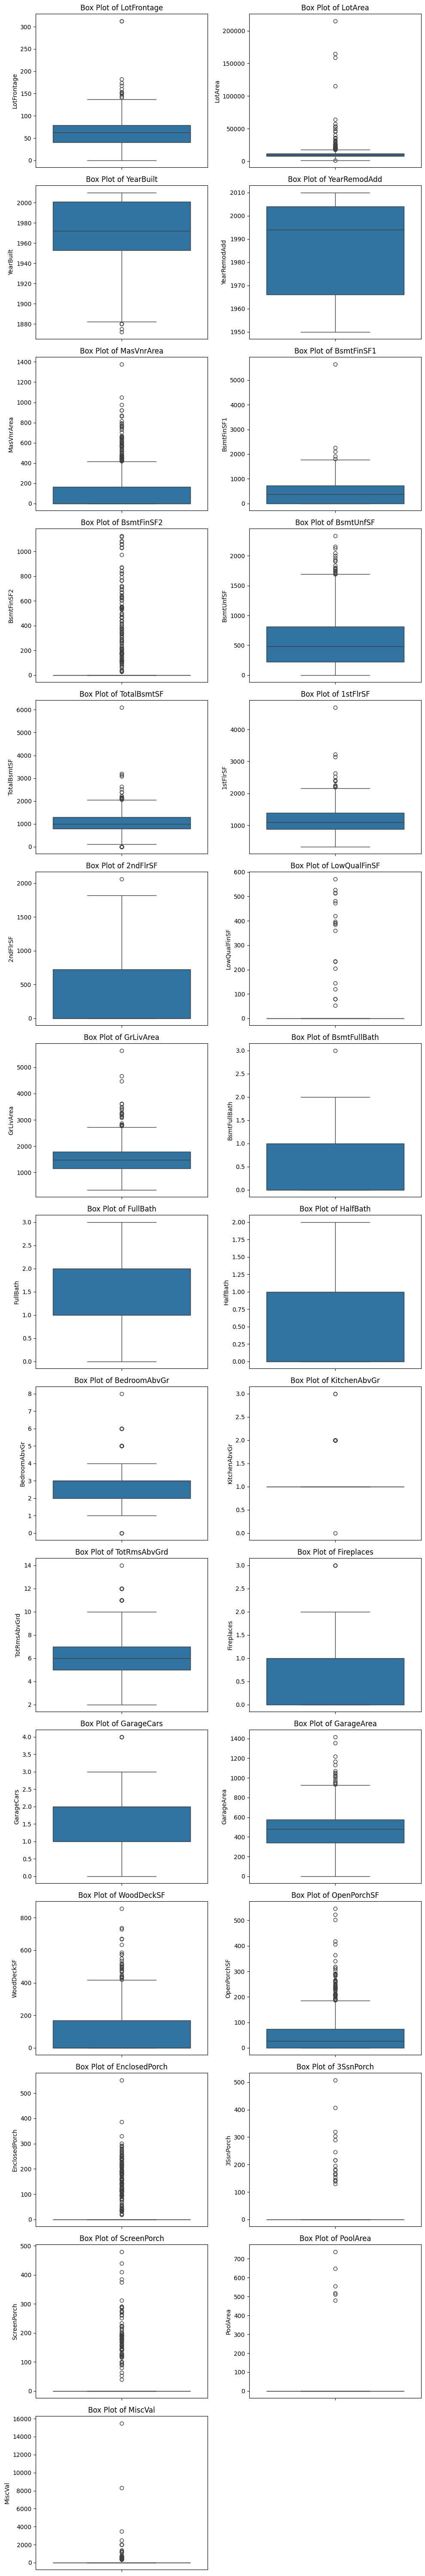

In [32]:
from functions import box_plot

box_plot(X_train, features, 2)

The identified outliers (points outside the box) are meaningful and relevant to the analysis, so they will not be removed.

Now let's check the values of the remaining features to see if there are no erroneous values according to their meanings :

In [33]:
remaining_features = list(set(numerical_features) - set(features) - set(['Id', 'SalePrice']))
remaining_features

['GarageYrBlt',
 'MoSold',
 'OverallQual',
 'BsmtHalfBath',
 'YrSold',
 'MSSubClass',
 'OverallCond']

In [34]:
for feature in remaining_features:
    print(feature, ': ', X_test[feature].unique())

GarageYrBlt :  [1963. 1994. 1927. 1950. 2008. 1972. 1939. 1978. 1970. 1955. 1928. 1968.
 2004. 2000. 1953. 1960. 1920. 2003. 1957. 2005. 1956. 1999. 1993. 2007.
 1951. 1997. 2006. 1986. 1946. 1965. 1985. 1981. 2009. 1930. 1964. 1966.
 1958. 1977. 1976. 1967. 1959. 1940. 1991. 1979. 1949. 1996. 1973. 1954.
 1938. 1935. 1948. 1969. 1982. 1987. 1983. 1936. 1962. 1933. 1974. 1998.
 1922. 1988. 1912. 2002. 1995. 1925. 2001. 1914. 1975. 1961. 1980. 1947.
 1926. 1992. 1990. 1952. 1971. 1921. 1941. 1910. 1989. 1924.]
MoSold :  [ 2  4  3 10  9  5  7 12  8 11  6  1]
OverallQual :  [ 6  8  5  9  4  7  3 10  2]
BsmtHalfBath :  [1 0 2]
YrSold :  [2006 2010 2009 2008 2007]
MSSubClass :  [ 20  60  30  50 180 160 120  70  80  90  45  40  75 190  85]
OverallCond :  [8 5 6 7 9 4 2 3]


The values of these features are correct according to the description, so let's now move on to examine the values of the categorical columns :

In [35]:
categorical_features = X_train.select_dtypes(include='object')

In [36]:
for feature in categorical_features:
    print(feature, " : ", X_train[feature].unique())

MSZoning  :  ['RL' 'RM' 'FV' 'RH' 'C (all)']
Street  :  ['Pave' 'Grvl']
Alley  :  ['NA' 'Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['NAmes' 'Gilbert' 'Edwards' 'SWISU' 'CollgCr' 'IDOTRR' 'NWAmes' 'Somerst'
 'Sawyer' 'Crawfor' 'OldTown' 'Timber' 'BrkSide' 'SawyerW' 'NridgHt'
 'Mitchel' 'NoRidge' 'Blmngtn' 'BrDale' 'NPkVill' 'Veenker' 'ClearCr'
 'StoneBr' 'MeadowV' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'RRAn' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRNn' 'RRNe']
Condition2  :  ['Norm' 'RRNn' 'PosA' 'Feedr' 'RRAe' 'PosN' 'Artery' 'RRAn']
BldgType  :  ['1Fam' 'Duplex' 'TwnhsE' '2fmCon' 'Twnhs']
HouseStyle  :  ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '1.5Unf' '2.5Unf' '2.5Fin']
RoofStyle  :  ['Gable' 'Hip' 'Mansard' 'Gambrel' 'Flat' 'Shed']
RoofMatl  :  ['CompShg' 'WdShngl' 'WdShake' 'Metal' 'Tar&Grv' 

Now, let's correct the errors in these features according to their descriptions :

In [37]:
X_train['MSZoning'] = X_train['MSZoning'].replace({'C (all)': 'C'})
X_test['MSZoning'] = X_test['MSZoning'].replace({'C (all)': 'C'})

X_train['BldgType'] = X_train['BldgType'].replace({'2fmCon': '2FmCon', 'Duplex': 'Duplx', 'Twnhs': 'TwnhsI'})
X_test['BldgType'] = X_test['BldgType'].replace({'2fmCon': '2FmCon', 'Duplex': 'Duplx', 'Twnhs': 'TwnhsI'})

X_train['Exterior2nd'] = X_train['Exterior2nd'].replace({'CmentBd':'CemntBd', 'Brk Cmn':'BrkComm'})
X_test['Exterior2nd'] = X_test['Exterior2nd'].replace({'CmentBd':'CemntBd', 'Brk Cmn':'BrkComm'})

**Categorical Features Encoding :**

In [38]:
for col in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']:
  X_train[col] = X_train[col].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
  X_test[col] = X_test[col].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

for col in ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'FireplaceQu']:
  X_train[col] = X_train[col].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
  X_test[col] = X_test[col].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
X_train['PoolQC'] = X_train['PoolQC'].map({'NA':0, 'Fa':1, 'Gd':2, 'Ex':3})
X_test['PoolQC'] = X_test['PoolQC'].map({'NA':0, 'Fa':1, 'Gd':2, 'Ex':3})

X_train['BsmtExposure'] = X_train['BsmtExposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
X_test['BsmtExposure'] = X_test['BsmtExposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})

X_train['CentralAir'] = X_train['CentralAir'].map({'N':0, 'Y':1})
X_test['CentralAir'] = X_test['CentralAir'].map({'N':0, 'Y':1})

X_train['PavedDrive'] = X_train['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
X_test['PavedDrive'] = X_test['PavedDrive'].map({'N':0, 'P':1, 'Y':2})

In [39]:
categorical_data_train = X_train.select_dtypes(include='object')
categorical_data_test = X_test.select_dtypes(include='object')

categorical_data = pd.concat([categorical_data_train, categorical_data_test])
one_hot = pd.get_dummies(categorical_data, dtype=int, drop_first=True)
one_hot_train = one_hot.iloc[:len(categorical_data_train), :]
one_hot_test = one_hot.iloc[len(categorical_data_train):, :]

In [40]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,3,CBlock,3,3,1,Rec,922,Unf,0,392,1314,GasA,2,1,SBrkr,1314,0,0,1314,1,0,1,0,3,1,2,5,Typ,0,0,Attchd,1957.0,RFn,1,294,3,3,2,250,0,0,0,0,0,0,NA,NA,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4,3,1,Unf,0,Unf,0,799,799,GasA,3,1,SBrkr,799,772,0,1571,0,0,2,1,3,1,2,7,Typ,1,3,Attchd,1993.0,RFn,2,380,3,3,2,0,40,0,0,0,0,0,NA,NA,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,2,2,CBlock,2,3,1,Unf,0,Unf,0,796,796,GasA,3,1,FuseA,796,0,0,796,0,0,1,0,2,1,2,4,Typ,0,0,NA,1910.0,NA,0,0,0,0,1,328,0,164,0,0,0,0,MnPrv,NA,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,2,2,BrkTil,4,3,1,ALQ,569,Unf,0,162,731,GasA,4,1,SBrkr,981,787,0,1768,1,0,1,1,3,1,3,7,Typ,2,3,Detchd,1939.0,Unf,1,240,3,3,2,0,0,264,0,0,0,0,MnPrv,NA,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,2,2,BrkTil,3,3,1,LwQ,218,Unf,0,808,1026,GasA,2,1,SBrkr,1026,665,0,1691,0,0,2,0,3,1,3,6,Typ,1,4,Detchd,1924.0,Unf,1,308,3,3,2,0,0,242,0,0,0,0,NA,NA,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,RL,78.0,9317,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4,3,1,GLQ,24,Unf,0,1290,1314,GasA,3,1,SBrkr,1314,0,0,1314,0,0,2,0,3,1,3,6,Typ,1,4,Attchd,2006.0,RFn,2,440,3,3,2,0,22,0,0,0,0,0,NA,NA,0,3,2007,WD,Normal
1130,50,RL,65.0,7804,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,2,2,BrkTil,3,3,1,BLQ,622,Unf,0,500,1122,GasA,2,1,SBrkr,1328,653,0,1981,1,0,2,0,4,1,3,7,Min2,2,3,Detchd,1981.0,Unf,2,576,3,3,2,431,44,0,0,0,0,0,MnPrv,NA,0,12,2009,WD,Normal
1294,20,RL,60.0,8172,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,2,2,CBlock,3,3,1,Rec,167,Unf,0,697,864,GasA,2,1,SBrkr,864,0,0,864,1,0,1,0,2,1,2,5,Typ,0,0,Detchd,1957.0,Unf,2,572,3,3,0,0,0,0,0,0,0,0,NA,NA,0,4,2006,WD,Normal
860,50,RL,55.0,7642,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,BrkTil,3,3,1,Unf,0,Unf,0,912,912,GasA,3,1,SBrkr,912,514,0,1426,0,0,1,1,3,1,3,7,Typ,1,4,Detchd,1925.0,Unf,1,216,3,3,2,0,240,0,0,0,0,0,GdPrv,NA,0,6,2007,WD,Normal


In [41]:
X_train_ = pd.concat([X_train.drop(categorical_data_train.columns, axis=1), one_hot_train], axis=1)
X_test_ = pd.concat([X_test.drop(categorical_data_test.columns, axis=1), one_hot_test], axis=1)

Let's align the columns to ensure consistency:

In [42]:
X_train, X_test = X_train_.align(X_test_, join='left', axis=1, fill_value=0)

Checking the shapes and NaNs again to ensure that the datasets are clean :

In [43]:
X_train.shape, X_test.shape

((1168, 225), (292, 225))

In [44]:
X_train.isnull().sum().sort_values()

MSSubClass               0
Exterior1st_VinylSd      0
Exterior1st_Wd Sdng      0
Exterior1st_WdShing      0
Exterior2nd_AsphShn      0
                        ..
Neighborhood_Mitchel     0
Neighborhood_NAmes       0
Neighborhood_NPkVill     0
BldgType_TwnhsI          0
SaleCondition_Partial    0
Length: 225, dtype: int64

In [45]:
X_test.isnull().sum().sort_values()

MSSubClass               0
Exterior1st_VinylSd      0
Exterior1st_Wd Sdng      0
Exterior1st_WdShing      0
Exterior2nd_AsphShn      0
                        ..
Neighborhood_Mitchel     0
Neighborhood_NAmes       0
Neighborhood_NPkVill     0
BldgType_TwnhsI          0
SaleCondition_Partial    0
Length: 225, dtype: int64

**Feature Selection**

Let's discover the reationships between numerical features using an interactive heatmap:

In [46]:
from functions import heat_map

heat_map(X_train, numerical_features)

As we can see, there are strong correlations between some features, such as:\
-'GarageYrBlt' and 'YearBuilt': 0.840\
-'GrLivArea' and 'TotRmAbvGrd': 0.820\
-'GarageCars' and 'GarageArea': 0.882\
One of each pair should be removed.

In [47]:
X_train = X_train.drop(['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars'], axis=1)
X_test = X_test.drop(['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars'], axis=1)

Let's now inspect the variances of the features and remove those with the lowest variance:

In [48]:
X_train.shape, X_test.shape

((1168, 222), (292, 222))

Visualizing the variances of the lowest 30 features :

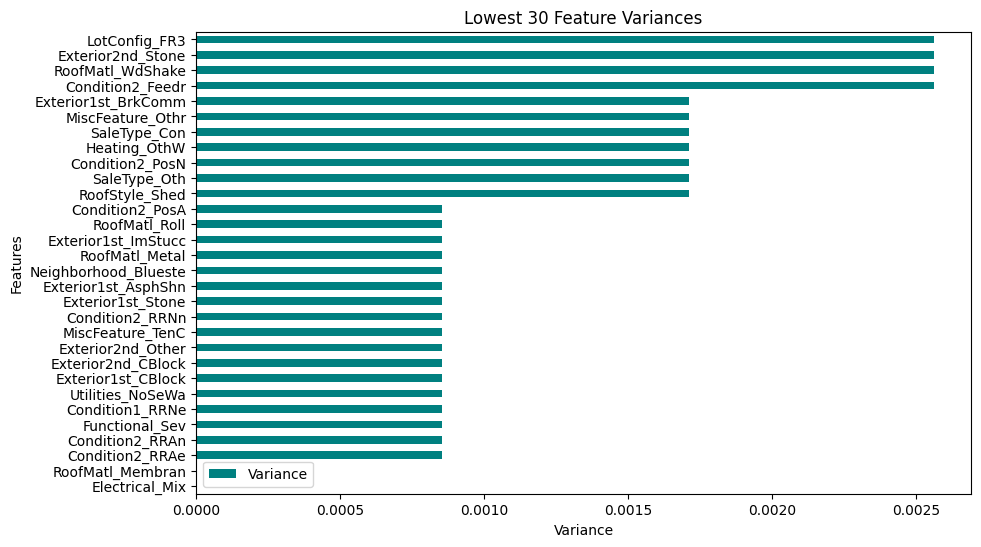

In [49]:
from functions import plot_low_variance

plot_low_variance(X_train, 30)

In [50]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.003)
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)

In [51]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(1168, 189)
(292, 189)


In [52]:
columns = X_train.columns[selector.get_support()]
X_train = pd.DataFrame(X_train_selected, columns=columns)
X_test = pd.DataFrame(X_test_selected, columns=columns)

Let's select the best features that explains the target feature y :

In [53]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=175)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [54]:
X_train_selected.shape, X_test_selected.shape

((1168, 175), (292, 175))

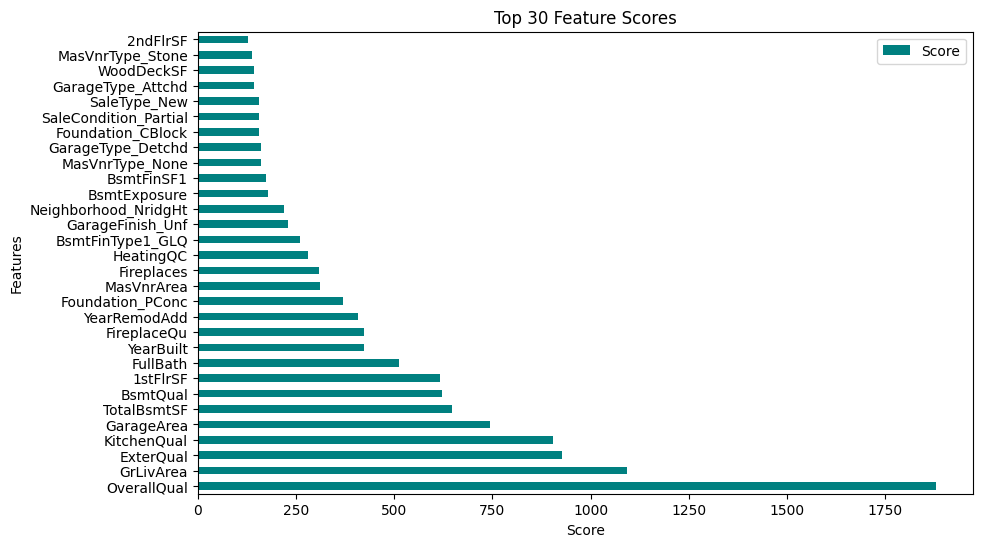

In [55]:
from functions import plot_k_best

plot_k_best(selector, columns, 30)

In [56]:
columns = X_train.columns[selector.get_support()]
X_train = pd.DataFrame(X_train_selected, columns=columns)
X_test = pd.DataFrame(X_test_selected, columns=columns)

**Scale the features to a range between 0 and 1 :**

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train and Evaluate Machine Learning Regression Algorithms on the dataset :**

-----------> Linear Regression Algorithm :

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
from functions import evaluate_model

evaluate_model(model, X_train, y_train, X_test, y_test)

... Evaluating on training data ...
Train MSE: 670160671.2710, Train R2: 0.8876
... Evaluating on testing data ...
Test MSE: 993566656.3035, Test R2: 0.8705


-----------> Random Forest Algorithm :

In [66]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=65, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=65, random_state=42)

In [67]:
evaluate_model(model, X_train, y_train, X_test, y_test)

... Evaluating on training data ...
Train MSE: 122521912.3116, Train R2: 0.9795
... Evaluating on testing data ...
Test MSE: 844283646.4001, Test R2: 0.8899


-----------> Gradient Boosting Regressor Algorithm :

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=65, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=65, random_state=42)

In [71]:
evaluate_model(model, X_train, y_train, X_test, y_test)

... Evaluating on training data ...
Train MSE: 240078959.2458, Train R2: 0.9597
... Evaluating on testing data ...
Test MSE: 791362438.4938, Test R2: 0.8968
